In [7]:
!pip install tensorflow_datasets
!pip install tensorflow-text

  Using cached tensorflow_text-2.5.0-cp37-cp37m-win_amd64.whl (2.1 MB)
  Using cached tensorflow-2.5.0-cp37-cp37m-win_amd64.whl (422.6 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached h5py-3.1.0-cp37-cp37m-win_amd64.whl (2.7 MB)
  Using cached absl_py-0.12.0-py3-none-any.whl (129 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Processing c:\users\14373\appdata\local\pip\cache\wheels\62\76\4c\aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6\wrapt-1.12.1-cp37-cp37m-win_amd64.whl
  Using cached grpcio-1.34.1-cp37-cp37m-win_amd64.whl (2.9 MB)
  Using cached keras_nightly-2.5.0.dev2021032900-py2.py3-none-any.whl (1.2 MB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.5.0-py2.py3-none-any.whl (462 kB)
  Using cached wheel-0.36.2-py2.py3-none-any.whl (35 kB)
  Using cached tensorboard-2

ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
ERROR: astroid 2.3.3 requires typed-ast<1.5,>=1.4.0; implementation_name == "cpython" and python_version < "3.8", which is not installed.
ERROR: tensorflow-gpu 2.1.0 has requirement gast==0.2.2, but you'll have gast 0.4.0 which is incompatible.
ERROR: tensorflow-gpu 2.1.0 has requirement tensorboard<2.2.0,>=2.1.0, but you'll have tensorboard 2.5.0 which is incompatible.
ERROR: rasa 1.10.8 has requirement absl-py<0.10,>=0.9, but you'll have absl-py 0.12.0 which is incompatible.
ERROR: rasa 1.10.8 has requirement networkx<2.5.0,>=2.4.0, but you'll have networkx 2.3 which is incompatible.
ERROR: rasa 1.10.8 has requirement packaging<21.0,>=20.0, but you'll have packaging 19.2 which is incompatible.
ERROR: rasa 1.10.8 has requirement pika<1.2.0,>=1.1.0, but you'll have pika 1.0.1 which is incompatible.
ERROR: rasa 1.10.8 h

In [26]:
import collections
import logging
import os
import pathlib
import re
import string
import sys
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow_text as text
import tensorflow as tf
logging.getLogger('tensorflow').setLevel(logging.ERROR)  # suppress warnings

In [27]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', with_info=True,
                               as_supervised=True)

train_examples, val_examples = examples['train'], examples['validation']


In [28]:
for example_pr, example_en in train_examples.batch(4).take(1):
    for pt in example_pr.numpy():
        print(pt.decode("utf-8"))
        
    print()
    
    for en in example_en.numpy():
        print(en.decode("utf-8"))

e quando melhoramos a procura , tiramos a única vantagem da impressão , que é a serendipidade .
mas e se estes fatores fossem ativos ?
mas eles não tinham a curiosidade de me testar .
e esta rebeldia consciente é a razão pela qual eu , como agnóstica , posso ainda ter fé .

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .


In [29]:
model_name = "ted_hrlr_translate_pt_en_converter"
tf.keras.utils.get_file(
    f"{model_name}.zip",
    f"https://storage.googleapis.com/download.tensorflow.org/models/{model_name}.zip",
    cache_dir='.', cache_subdir='', extract=True
)

tokenizers = tf.saved_model.load(model_name)


[item for item in dir(tokenizers.en) if not item.startswith('_')]

['detokenize',
 'get_reserved_tokens',
 'get_vocab_path',
 'get_vocab_size',
 'lookup',
 'tokenize',
 'tokenizer',
 'vocab']

In [30]:
for en in example_en.numpy():
  print(en.decode('utf-8'))
  
  
encoded=tokenizers.en.tokenize(example_en)

for row in encoded.to_list():
    print(row)
    
    
detokenizer=tokenizers.en.detokenize(encoded)

for line in detokenizer.numpy():
    print(line.decode('utf-8'))
    
    
token=tokenizers.en.lookup(encoded)

token

and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .
[2, 72, 117, 79, 1259, 1491, 2362, 13, 79, 150, 184, 311, 71, 103, 2308, 74, 2679, 13, 148, 80, 55, 4840, 1434, 2423, 540, 15, 3]
[2, 87, 90, 107, 76, 129, 1852, 30, 3]
[2, 87, 83, 149, 50, 9, 56, 664, 85, 2512, 15, 3]
[2, 72, 81, 2508, 2159, 3072, 1282, 80, 192, 45, 13, 100, 111, 6040, 3176, 3186, 13, 94, 235, 89, 1938, 15, 3]
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n ' t test for curiosity .
and this conscious defiance is why i , as an agnostic , can still have faith .


<tf.RaggedTensor [[b'[START]', b'and', b'when', b'you', b'improve', b'search', b'##ability', b',', b'you', b'actually', b'take', b'away', b'the', b'one', b'advantage', b'of', b'print', b',', b'which', b'is', b's', b'##ere', b'##nd', b'##ip', b'##ity', b'.', b'[END]'], [b'[START]', b'but', b'what', b'if', b'it', b'were', b'active', b'?', b'[END]'], [b'[START]', b'but', b'they', b'did', b'n', b"'", b't', b'test', b'for', b'curiosity', b'.', b'[END]'], [b'[START]', b'and', b'this', b'conscious', b'de', b'##fi', b'##ance', b'is', b'why', b'i', b',', b'as', b'an', b'ag', b'##no', b'##stic', b',', b'can', b'still', b'have', b'faith', b'.', b'[END]']]>

In [31]:
def tokenize_pairs(en,pt):
    pt=tokenizers.pt.tokenize(pt)
    #convert ragged to dense by adding padding with zero
    pt=pt.to_tensor()
    
    en=tokenizers.en.tokenize(en)
    en=en.to_tensor()
    
    return en, pt

In [32]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [33]:
def make_batches(ds):
    return(
    ds
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .map(tokenize_pairs, num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE))


In [34]:
train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)

In [35]:
print(train_batches)

<PrefetchDataset shapes: ((None, None), (None, None)), types: (tf.int64, tf.int64)>


# Positional Encoding:
Embeddings represent a token in a d-dimensional space where tokens with similar meaning will be closer to each other.But the embeddings do not encode the relative position of words in a sentence. So after adding the positional encoding, words will be closer to each other based on the similarity of their meaning and their position in the sentence, in the d-dimensional space.

In [36]:
### optional
print(np.arange(3))
### np.newaxis
print("====newaxis====")
print(np.arange(10)[:,np.newaxis])
pos=np.arange(10)[:,np.newaxis]

[0 1 2]
====newaxis====
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [37]:
## optional
i=np.arange(5)[np.newaxis, :]
np.arange(5)[np.newaxis, :]

array([[0, 1, 2, 3, 4]])

In [38]:
## optional 
angle_rads=pos/np.power(1000,(2*i)/np.float32(5))
pos/np.power(1000,(2*i)/np.float32(5))

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.00000000e+00, 6.30957344e-02, 3.98107171e-03, 2.51188643e-04,
        1.58489319e-05],
       [2.00000000e+00, 1.26191469e-01, 7.96214341e-03, 5.02377286e-04,
        3.16978638e-05],
       [3.00000000e+00, 1.89287203e-01, 1.19432151e-02, 7.53565929e-04,
        4.75467958e-05],
       [4.00000000e+00, 2.52382938e-01, 1.59242868e-02, 1.00475457e-03,
        6.33957277e-05],
       [5.00000000e+00, 3.15478672e-01, 1.99053585e-02, 1.25594322e-03,
        7.92446596e-05],
       [6.00000000e+00, 3.78574407e-01, 2.38864302e-02, 1.50713186e-03,
        9.50935915e-05],
       [7.00000000e+00, 4.41670141e-01, 2.78675019e-02, 1.75832050e-03,
        1.10942523e-04],
       [8.00000000e+00, 5.04765876e-01, 3.18485736e-02, 2.00950915e-03,
        1.26791455e-04],
       [9.00000000e+00, 5.67861610e-01, 3.58296453e-02, 2.26069779e-03,
        1.42640387e-04]])

In [39]:
## optional
angle_rads[:,0::2] = np.sin(angle_rads[:, 0::2])
angle_rads[:,0::2]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.41470985e-01,  3.98106119e-03,  1.58489319e-05],
       [ 9.09297427e-01,  7.96205928e-03,  3.16978638e-05],
       [ 1.41120008e-01,  1.19429312e-02,  4.75467958e-05],
       [-7.56802495e-01,  1.59236138e-02,  6.33957277e-05],
       [-9.58924275e-01,  1.99040441e-02,  7.92446595e-05],
       [-2.79415498e-01,  2.38841589e-02,  9.50935914e-05],
       [ 6.56986599e-01,  2.78638951e-02,  1.10942523e-04],
       [ 9.89358247e-01,  3.18431897e-02,  1.26791455e-04],
       [ 4.12118485e-01,  3.58219797e-02,  1.42640387e-04]])

In [40]:
## optional
np.power(3, (2 * (i//2)))

array([[ 1,  1,  9,  9, 81]], dtype=int32)

In [41]:
def get_angle(pos, i,d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates

In [42]:
def positional_encoding(position,d_model):
    angle_rads=get_angle(np.arange(position)[:,np.newaxis],np.arange(d_model)[np.newaxis, :],d_model )
    angle_rads[:,0::2]=np.sin(angle_rads[:,0::2])
    
    angle_rads[:,1::2]=np.cos(angle_rads[:,1::2])
    
    pos_encoding=angle_rads[np.newaxis,...]
    
    return tf.cast(pos_encoding, dtype=tf.float32)
    

(1, 2048, 512)


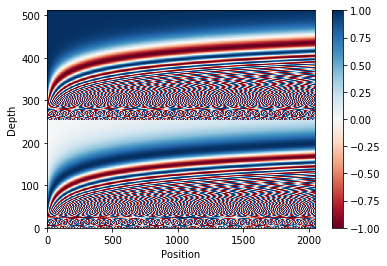

In [43]:
n, d = 2048, 512
pos_encoding = positional_encoding(n, d)
print(pos_encoding.shape)
pos_encoding = pos_encoding[0]

# Juggle the dimensions for the plot
pos_encoding = tf.reshape(pos_encoding, (n, d//2, 2))
pos_encoding = tf.transpose(pos_encoding, (2, 1, 0))
pos_encoding = tf.reshape(pos_encoding, (d, n))

plt.pcolormesh(pos_encoding, cmap='RdBu')
plt.ylabel('Depth')
plt.xlabel('Position')
plt.colorbar()
plt.show()

# Masking
Mask all the pad tokens in the batch of sequence. It ensures that the model does not treat padding as the input. The mask indicates where pad value 0 is present: it outputs a 1 at those locations, and a 0 otherwise.

In [44]:
## optional what tf.cast function do?
x = tf.constant([1.8, 2.2], dtype=tf.float32)
tf.cast(x, tf.int32)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 2])>

In [45]:
x = tf.constant([2, 4])
y = tf.constant(2)
tf.math.equal(x, y)

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

In [46]:
def create_padding_mask(seq):
    seq=tf.cast(tf.math.equal(seq,0),tf.float32)
    return seq[:,tf.newaxis,tf.newaxis,:]

In [47]:
x = tf.constant([[7, 6, 0, 0, 1], [1, 2, 3, 0, 0], [0, 0, 0, 4, 5]])
create_padding_mask(x)

<tf.Tensor: shape=(3, 1, 1, 5), dtype=float32, numpy=
array([[[[0., 0., 1., 1., 0.]]],


       [[[0., 0., 0., 1., 1.]]],


       [[[1., 1., 1., 0., 0.]]]], dtype=float32)>

# look-ahead mask
It is used to mask the future tokens in a sequence. In other words, the mask indicates which entries should not be used.

In [48]:
### optional
input=tf.constant([[ 0,  1,  2, 3],
              [-1,  0,  1, 2],
              [-2, -1,  0, 1],
               [-3, -2, -1, 0]])

 #tf.linalg.band_part(input, 0, -1) ==> Upper triangular part.
 #tf.linalg.band_part(input, -1, 0) ==> Lower triangular part.
 #tf.linalg.band_part(input, 0, 0) ==> Diagonal.
tf.linalg.band_part(input, -1, 0)    

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[ 0,  0,  0,  0],
       [-1,  0,  0,  0],
       [-2, -1,  0,  0],
       [-3, -2, -1,  0]])>

In [49]:
def create_look_ahead_mask(size):
  mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
  return mask  # (seq_len, seq_len)

In [25]:
x = tf.random.uniform((1, 3))
temp = create_look_ahead_mask(x.shape[1])
temp

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

# Scaled dot product attention
The attention function used by the transformer takes three inputs: Q (query), K (key), V (value). The equation used to calculate the attention weights is:
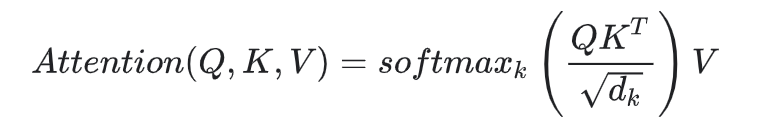

The dot-product attention is scaled by a factor of square root of the depth. 

*** This is done because for large values of depth, the dot product grows large in magnitude pushing the softmax function where it has small gradients resulting in a very hard softmax.

In [50]:
## optional
softmax = tf.nn.softmax([-1, 0., 1.])
softmax

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>

In [51]:
sum(softmax)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [82]:
def scaled_dot_product_attention(q,k,v,mask):
    
    matmul_qk=tf.matmul(q,k,transpose_b=True)
    
    ### depth: key.shape
    seq_len_q,depth=tf.shape(k)

    dk=tf.cast(depth,tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    if mask is not None:
        scaled_attention_logits+=(mask* -1e9)
        
    ###As the softmax normalization is done on K, its values decide the amount of importance given to Q.
    attention_weight= tf.nn.softmax(scaled_attention_logits, axis=-1)
    
    #The output represents the multiplication of the attention weights and the V (value) vector. 
    #This ensures that the words you want to focus on are kept as-is and the irrelevant words are flushed out.
    output=tf.matmul(attention_weight,v)
    
    return output, attention_weight

In [83]:
def print_out(q, k, v):
  temp_out, temp_attn = scaled_dot_product_attention(
      q, k, v, None)
  print('Attention weights are:')
  print(temp_attn)
  print('Output is:')
  print(temp_out)

In [84]:
np.set_printoptions(suppress=True)

temp_k = tf.constant([[10, 0, 0],
                      [0, 10, 0],
                      [0, 0, 10],
                      [0, 0, 10]], dtype=tf.float32)  # (4, 3)

temp_v = tf.constant([[1, 0],
                      [10, 0],
                      [100, 5],
                      [1000, 6]], dtype=tf.float32)  # (4, 2)

In [85]:
# This `query` aligns with the second `key`,
# so the second `value` is returned.
temp_q = tf.constant([[0, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0. 1. 0. 0.]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[10.  0.]], shape=(1, 2), dtype=float32)


In [86]:
# This query aligns with a repeated key (third and fourth),
# so all associated values get averaged.
temp_q = tf.constant([[0, 0, 10]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.  0.  0.5 0.5]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[550.    5.5]], shape=(1, 2), dtype=float32)


In [87]:
# This query aligns equally with the first and second key,
# so their values get averaged.
temp_q = tf.constant([[10, 10, 0]], dtype=tf.float32)  # (1, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor([[0.5 0.5 0.  0. ]], shape=(1, 4), dtype=float32)
Output is:
tf.Tensor([[5.5 0. ]], shape=(1, 2), dtype=float32)


In [88]:
temp_q = tf.constant([[0, 0, 10],
                      [0, 10, 0],
                      [10, 10, 0]], dtype=tf.float32)  # (3, 3)
print_out(temp_q, temp_k, temp_v)

Attention weights are:
tf.Tensor(
[[0.  0.  0.5 0.5]
 [0.  1.  0.  0. ]
 [0.5 0.5 0.  0. ]], shape=(3, 4), dtype=float32)
Output is:
tf.Tensor(
[[550.    5.5]
 [ 10.    0. ]
 [  5.5   0. ]], shape=(3, 2), dtype=float32)
